# K-Fold Cross-Validation w praktyce - Analiza wrażliwości K

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut, KFold, cross_val_score, train_test_split
%matplotlib inline

In [10]:
dataset = pd.read_csv('VLagun_Phys_Years3.csv')
dataset

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.00,7.5000,8.5650,3.5,3.3,0
1,3.504707,9.89,19.1,50.00,7.8600,8.5200,0.0,3.6,0
2,3.757624,9.66,18.1,59.00,8.1720,8.4915,1.0,3.4,0
3,3.107266,10.36,19.5,46.00,7.8480,8.8320,0.0,2.9,0
4,2.619498,11.56,19.0,42.00,7.5360,9.2400,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...
115,4.500000,9.93,16.3,117.50,7.0180,13.0645,8.5,3.2,1
116,4.600000,10.02,16.2,115.00,7.0905,11.4115,10.2,3.3,1
117,4.500000,9.93,16.3,113.75,7.0615,11.7595,9.5,3.4,1
118,4.200000,10.30,16.0,102.50,7.1050,12.4410,10.5,3.3,1


In [11]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X.shape, y.shape

((120, 8), (120,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
features, targets = X, y

In [13]:
def get_dataset(n_samples=120):
    X, y = make_classification(n_samples=n_samples, n_features=7, random_state=1)
    return X, y

def get_model():
    model = LogisticRegression()
    return model

def evaluate_model(cv):
    X, y = get_dataset()
    model = get_model()
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return np.mean(scores), scores.min(), scores.max()

In [14]:
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal:', ideal)
folds = range(2, 31)
means, mins, maxs = list(), list(), list()

Ideal: 0.8666666666666667


In [15]:
for k in folds:
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    k_mean, k_min, k_max = evaluate_model(cv)
    print('> folds=%d, accuracy=%.3f (%.3f, %.3f)' % (k, k_mean, k_min, k_max))
    means.append(k_mean)
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)

> folds=2, accuracy=0.833 (0.817, 0.850)
> folds=3, accuracy=0.883 (0.825, 0.925)
> folds=4, accuracy=0.867 (0.767, 0.967)
> folds=5, accuracy=0.883 (0.792, 1.000)
> folds=6, accuracy=0.867 (0.750, 1.000)
> folds=7, accuracy=0.866 (0.647, 1.000)
> folds=8, accuracy=0.858 (0.667, 1.000)
> folds=9, accuracy=0.866 (0.615, 1.000)
> folds=10, accuracy=0.867 (0.583, 1.000)
> folds=11, accuracy=0.868 (0.636, 1.000)
> folds=12, accuracy=0.867 (0.600, 1.000)
> folds=13, accuracy=0.866 (0.556, 1.000)
> folds=14, accuracy=0.862 (0.667, 1.000)
> folds=15, accuracy=0.867 (0.500, 1.000)
> folds=16, accuracy=0.869 (0.500, 1.000)
> folds=17, accuracy=0.867 (0.429, 1.000)
> folds=18, accuracy=0.872 (0.571, 1.000)
> folds=19, accuracy=0.866 (0.500, 1.000)
> folds=20, accuracy=0.867 (0.500, 1.000)
> folds=21, accuracy=0.871 (0.500, 1.000)
> folds=22, accuracy=0.867 (0.400, 1.000)
> folds=23, accuracy=0.857 (0.400, 1.000)
> folds=24, accuracy=0.858 (0.400, 1.000)
> folds=25, accuracy=0.864 (0.400, 1.000)


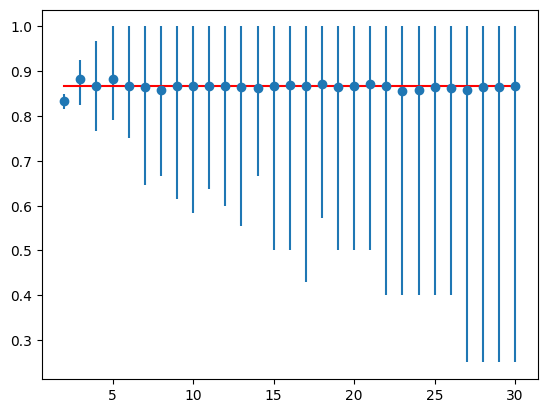

In [16]:
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
plt.plot(folds, [ideal for _ in range(len(folds))], color='r')
plt.show()

Folds 3 i 5 mają największy accuracy_score